In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib notebook
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
sns.set(style="ticks", color_codes=True)


In [2]:
df = pd.read_pickle('./Data/process_data_df10.pkl')

`pa_coating` is a dummy variable and doesn't belong to the original collected data. For further analysis it can be dropped.

### Removing unnecessary columns

In [3]:
colsToRemove = ['pa_coating']

df1 = df.copy()
df1.drop(labels=colsToRemove,axis='columns',level=1,inplace=True)

Let's check whether the variables where succesfully removed:

In [4]:
# Check if any elements of colsToRemove is in df
print('Are any of the `colsToRemove` in `df`?')
print('  ',any([i for i in colsToRemove if i in df.columns.get_level_values(level=1)]))
print('\n')

# Check if any elements of colsToRemove is in df1
print('Are any of the `colsToRemove` in `df1`?')
print('  ',any([i for i in colsToRemove if i in df1.columns.get_level_values(level=1)]))

Are any of the `colsToRemove` in `df`?
   True


Are any of the `colsToRemove` in `df1`?
   False


### Exploring `p_product`, `p_product_type` and `p_product_group` 

Nice! Now we could keep removing unnecessary columns, but let's focus in the feature we want to keep/analyse.

My 1st question is: 
> Do the features `qc_salzrckhalt` and `qc_durchfluss` vary significantly among different `p_product`, `p_product_type` and `p_product_group`? 

In [5]:
# df1.head()
# df1.loc[:,(slice(None),['ps','nr','p_product','p_product_group','p_product_type','qc_salzrckhalt','qc_durchfluss'])].head()

In [6]:
df2 = df1.copy()
df2 = df2.droplevel(level= 0, axis='columns')

XY  = df2[['nr','p_product_group','p_product_type','p_product','qc_salzrckhalt','qc_durchfluss']]
# Y  = df2[['qc_salzrckhalt','qc_durchfluss']]
# X  = df2[['nr','p_product','p_product_group','p_product_type']]

In [7]:
groupCols = ['p_product_group','p_product_type','p_product']
goalCols  = ['qc_salzrckhalt','qc_durchfluss']

XY_mean = XY.groupby(groupCols)[goalCols].mean()
XY_var  = XY.groupby(groupCols)[goalCols].var()
# pd.concat({'mean':XY_mean,'var':XY_var},axis=1)

pd.merge(XY_mean,XY_var,
         sort=True,
         suffixes=('_mean','_var'),
         left_index=True,
         right_index=True)

# pd.options.display.max_rows = 10000
pd.reset_option("display.max_rows")
XY_mean.join(XY_var,
      lsuffix='_mean',
      rsuffix='_var')

qc_salzrckhalt_mean  \
p_product_group     p_product_type p_product                            
Brackwasserelemente 5200bdfc01a1   B400 HP                  98.989131   
                                   B440 HP                  99.163510   
                    6989995295da   B085 LE 4040             99.144588   
                                   B400 LE                  98.935167   
                                   B400 LE ASD              99.055540   
                                   B440 LE                  98.782107   
                    6d2830b1e76d   B085 HF 4040             99.113559   
                                   B400 HF                  99.012014   
                                   B440 HF                  98.694982   
                    c77cb1692e0e   B085 ULP 4040            99.271320   
                                   B400 ULP ASD             98.050863   
                                   B440 ULP                 98.218921   
                    f187928fdb22   B370 FR                  98.812073   
                                   B400 FR ASD              99.013156   
                    f8ba29e9058b   B085 FR 4040             98.701824   
                                   B400 FR                  98.924073   
Seewasserelemente   320144db7b4b   S085 HF 4040             98.616838   
                                   S400 HF                  96.226096   
                                   S440 HF                  99.343883   
                    cd7216b44ce3   S085 HR 4040             98.377514   
                                   S400 HR                  96.653459   
                                   S440 HR                  98.344120   

                                                  qc_durchfluss_mean  \
p_product_group     p_product_type p_product                           
Brackwasserelemente 5200bdfc01a1   B400 HP                 47.087445   
                                   B440 HP                 54.066717   
                    6989995295da   B085 LE 4040             7.833652   
                                   B400 LE                 35.869479   
                                   B400 LE ASD             38.267354   
                                   B440 LE                 40.682883   
                    6d2830b1e76d   B085 HF 4040            10.152490   
                                   B400 HF                 45.510025   
                                   B440 HF                 47.145020   
                    c77cb1692e0e   B085 ULP 4040            8.298521   
                                   B400 ULP ASD            41.327267   
                                   B440 ULP                45.644223   
                    f187928fdb22   B370 FR                 40.580885   
                                   B400 FR ASD             46.633970   
                    f8ba29e9058b   B085 FR 4040            10.073621   
                                   B400 FR                 44.725683   
Seewasserelemente   320144db7b4b   S085 HF 4040             7.088446   
                                   S400 HF                 33.766855   
                                   S440 HF                 39.621275   
                    cd7216b44ce3   S085 HR 4040             6.265555   
                                   S400 HR                 27.447772   
                                   S440 HR                 25.526313   

                                                  qc_salzrckhalt_var  \
p_product_group     p_product_type p_product                           
Brackwasserelemente 5200bdfc01a1   B400 HP                 71.476345   
                                   B440 HP                 51.370364   
                    6989995295da   B085 LE 4040            44.251208   
                                   B400 LE                 66.230018   
                                   B400 LE ASD             53.562097   
                                   B440 LE                 86.79

In [8]:
groupCols = ['p_product_group','p_product_type','p_product']
goalCols  = ['qc_salzrckhalt','qc_durchfluss']

(XY.groupby(groupCols)[goalCols]
   .describe()
)

qc_salzrckhalt             \
                                                          count       mean   
p_product_group     p_product_type p_product                                 
Brackwasserelemente 5200bdfc01a1   B400 HP               9948.0  98.989131   
                                   B440 HP               1928.0  99.163510   
                    6989995295da   B085 LE 4040          6068.0  99.144588   
                                   B400 LE               2105.0  98.935167   
                                   B400 LE ASD           5359.0  99.055540   
                                   B440 LE               6503.0  98.782107   
                    6d2830b1e76d   B085 HF 4040          4880.0  99.113559   
                                   B400 HF              22093.0  99.012014   
                                   B440 HF              24380.0  98.694982   
                    c77cb1692e0e   B085 ULP 4040         1895.0  99.271320   
                                   B400 ULP ASD          8188.0  98.050863   
                                   B440 ULP              3921.0  98.218921   
                    f187928fdb22   B370 FR               6034.0  98.812073   
                                   B400 FR ASD           1043.0  99.013156   
                    f8ba29e9058b   B085 FR 4040          1425.0  98.701824   
                                   B400 FR               7210.0  98.924073   
Seewasserelemente   320144db7b4b   S085 HF 4040           204.0  98.616838   
                                   S400 HF               3133.0  96.226096   
                                   S440 HF                451.0  99.343883   
                    cd7216b44ce3   S085 HR 4040           240.0  98.377514   
                                   S400 HR               1512.0  96.653459   
                                   S440 HR                150.0  98.344120   

                                                                             \
                                                        std  min        25%   
p_product_group     p_product_type p_product                                  
Brackwasserelemente 5200bdfc01a1   B400 HP         8.454368  0.0  99.675646   
                                   B440 HP         7.167312  0.0  99.634706   
                    6989995295da   B085 LE 4040    6.652158  0.0  99.525049   
                                   B400 LE         8.138183  0.0  99.576432   
                                   B400 LE ASD     7.318613  0.0  99.529691   
                                   B440 LE         9.316274  0.0  99.636029   
                    6d2830b1e76d   B085 HF 4040    7.970894  0.0  99.751950   
                                   B400 HF         8.425166  0.0  99.710536   
                                   B440 HF        10.014229  0.0  99.686608   
                    c77cb1692e0e   B085 ULP 4040   4.568695  0.0  99.400840   
                                   B400 ULP ASD   11.916605  0.0  99.479194   
                                   B440 ULP       11.374236  0.0  99.527297   
                    f187928fdb22   B370 FR         9.664824  0.0  99.752058   
                                   B400 FR ASD     8.709861  0.0  99.754335   
                    f8ba29e9058b   B085 FR 4040   10.199613  0.0  99.765123   
                                   B400 FR         8.803255  0.0  99.716162   
Seewasserelemente   320144db7b4b   S085 HF 4040    9.842117  0.0  99.586770   
                                   S400 HF        18.185313  0.0  99.605332   
                                   S440 HF         4.694988  0.0  99.581914   
                    cd7216b44ce3   S085 HR 4040   11.093121  0.0  99.636603   
                                   S400 HR        16.741138  0.0  99.443625   
                                   S440 HR        11.471257  0.0  99.606835   

                                                                        \
                                                

<IPython.core.display.Javascript object>


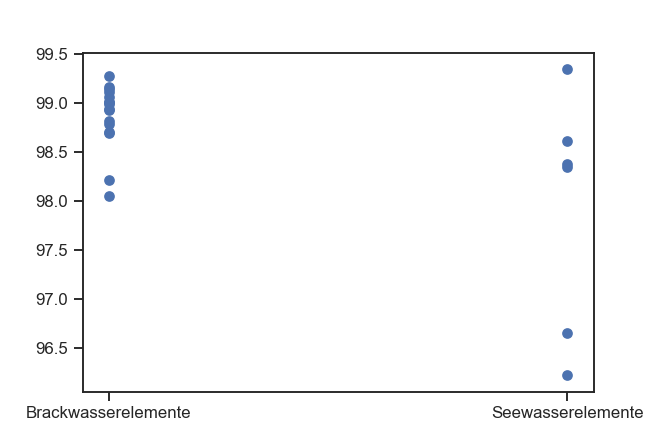

In [15]:
groupCols = ['p_product_group','p_product_type','p_product']
goalCols  = ['qc_salzrckhalt','qc_durchfluss']

XY_mean = XY.groupby(groupCols)[goalCols].mean()
XY_std  = XY.groupby(groupCols)[goalCols].std()

smry= XY_mean.join(XY_std,
      lsuffix='_mean',
      rsuffix='_std')

dir(smry.index)

smry.index.get_level_values(level='p_product_group')

#smry['p_product_group']

%matplotlib notebook

fig1 = plt.figure(figsize=[6,4])
plt.scatter(smry.index.get_level_values(level='p_product_group'),smry['qc_salzrckhalt_mean'])
plt.show()



<IPython.core.display.Javascript object>


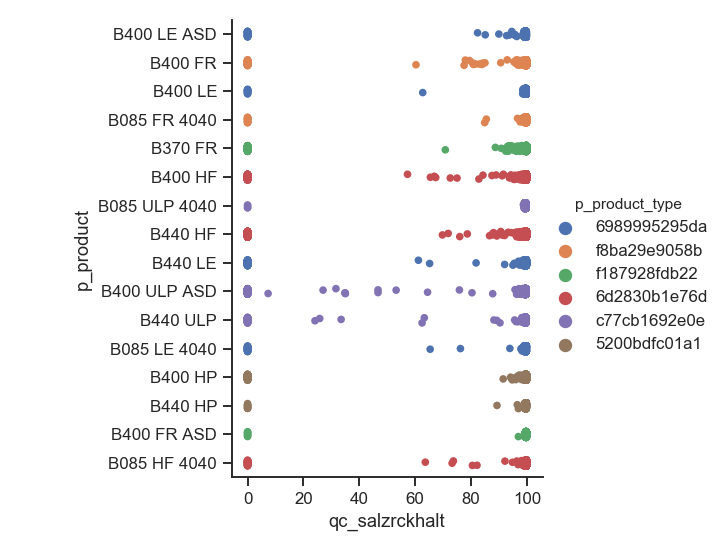

In [19]:
#sns.catplot(y='p_product_type',x='qc_salzrckhalt',hue='p_product_group',data=XY)
sns.catplot(y='p_product',x='qc_salzrckhalt',hue='p_product_type',data=XY[XY['p_product_group'] == 'Brackwasserelemente'])
plt.show()

<IPython.core.display.Javascript object>


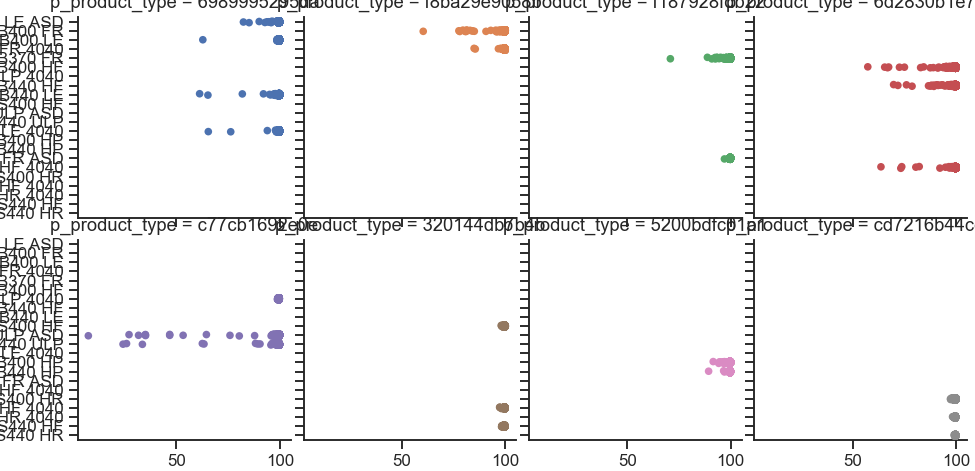

In [28]:
(XY
 .query("qc_salzrckhalt>0") # filter out zero values, since they appear to not make sense, i.e. 
 .dropna()                   # drop missing values
 .pipe((sns.catplot,'data')
       ,y='p_product',x='qc_salzrckhalt',col='p_product_type',col_wrap = 4,hue='p_product_type',kind='strip'))

plt.show()

In [24]:
XY.dtypes

nr                 float64
p_product_group     object
p_product_type      object
p_product           object
qc_salzrckhalt     float64
qc_durchfluss      float64
dtype: object

In [108]:
XY.query("qc_salzrckhalt!=0").dropna().pipe()

,nr,p_product,p_product_group,p_product_type,qc_salzrckhalt,qc_durchfluss
0,2891.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.455138,36.818009
1,2891.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.530406,36.787088
2,2891.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.523320,36.298863
3,2891.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.567549,36.045929
4,2891.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.577392,36.311320
...,...,...,...,...,...,...
118682,2892.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.404884,33.037030
118683,2892.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.453192,32.577132
118684,2892.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.407655,31.884684
118685,2892.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.484820,34.474326


In [50]:
XY[XY['p_product_group'] == 'Brackwasserelemente']

,nr,p_product,p_product_group,p_product_type,qc_salzrckhalt,qc_durchfluss
0,2891.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.455138,36.818009
1,2891.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.530406,36.787088
2,2891.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.523320,36.298863
3,2891.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.567549,36.045929
4,2891.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.577392,36.311320
...,...,...,...,...,...,...
118682,2892.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.404884,33.037030
118683,2892.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.453192,32.577132
118684,2892.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.407655,31.884684
118685,2892.0,B400 LE ASD,Brackwasserelemente,6989995295da,99.484820,34.474326


<IPython.core.display.Javascript object>


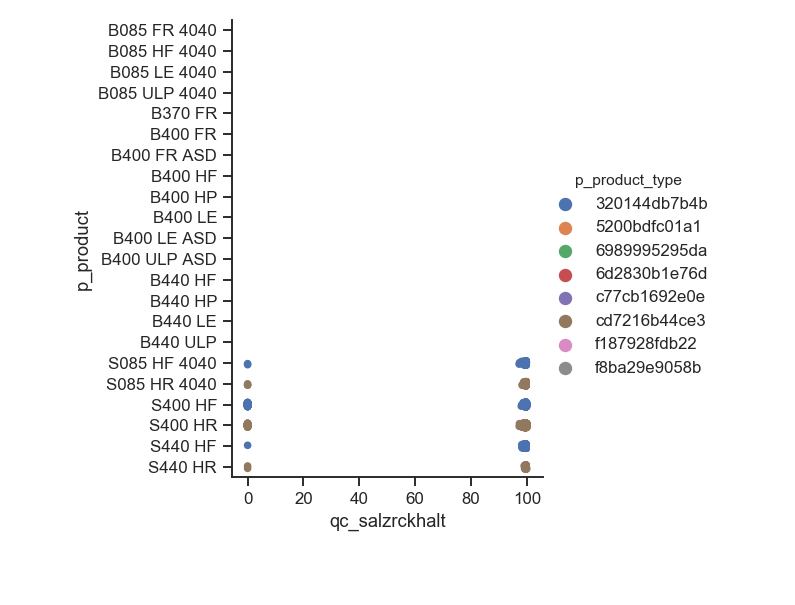

In [57]:
sns.catplot(y='p_product',x='qc_salzrckhalt',hue='p_product_type',data=XY[XY['p_product_group'] == 'Seewasserelemente'])
plt.show()

In [12]:
XY.dropna()

,nr,p_product_group,p_product_type,p_product,qc_salzrckhalt,qc_durchfluss
0,2891.0,Brackwasserelemente,6989995295da,B400 LE ASD,99.455138,36.818009
1,2891.0,Brackwasserelemente,6989995295da,B400 LE ASD,99.530406,36.787088
2,2891.0,Brackwasserelemente,6989995295da,B400 LE ASD,99.523320,36.298863
3,2891.0,Brackwasserelemente,6989995295da,B400 LE ASD,99.567549,36.045929
4,2891.0,Brackwasserelemente,6989995295da,B400 LE ASD,99.577392,36.311320
...,...,...,...,...,...,...
118682,2892.0,Brackwasserelemente,6989995295da,B400 LE ASD,99.404884,33.037030
118683,2892.0,Brackwasserelemente,6989995295da,B400 LE ASD,99.453192,32.577132
118684,2892.0,Brackwasserelemente,6989995295da,B400 LE ASD,99.407655,31.884684
118685,2892.0,Brackwasserelemente,6989995295da,B400 LE ASD,99.484820,34.474326


In [13]:
XY.dtypes

nr                  float64
p_product_group    category
p_product_type     category
p_product          category
qc_salzrckhalt      float64
qc_durchfluss       float64
dtype: object

In [14]:
df = pd.DataFrame({'Animal' : ['Falcon', 'Falcon','Parrot', 'Parrot'],
                   'Max Speed' : [380., 370., 24., 26.]})
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


### Categorical variables:
**Is there a difference in the distribution of `qc_salzrckhalt` or `qc_durchfluss`**
 
 product type, group,etc 

In [15]:
df2 = df1.copy()
df2 = df2.droplevel(level= 0, axis='columns')

In [16]:
XY = df2[['nr','p_product','p_product_group','p_product_type','qc_salzrckhalt','qc_durchfluss']]
Y  = df2[['qc_salzrckhalt','qc_durchfluss']]
X  = df2[['nr','p_product','p_product_group','p_product_type']]

In [17]:
X.nr.unique()
{col:X[col].nunique() for col in X}

{'nr': 1255, 'p_product': 22, 'p_product_group': 2, 'p_product_type': 8}

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,8]

In [19]:
u_ptypes = XY['p_product_type'].unique()
u_pgroup = XY['p_product_group'].unique()

ValueError: not enough values to unpack (expected 2, got 0)

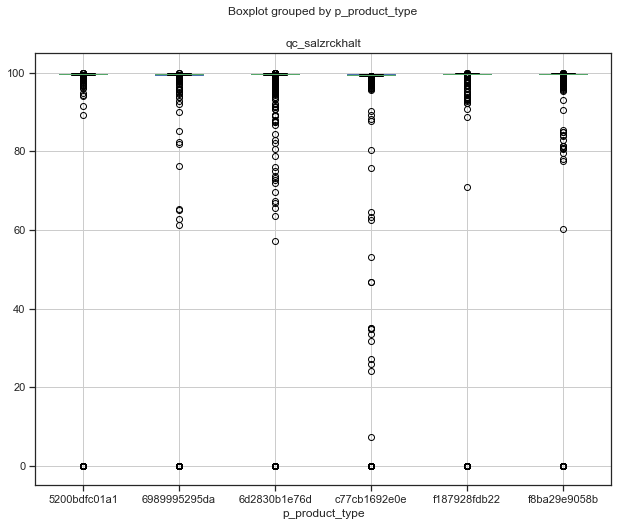

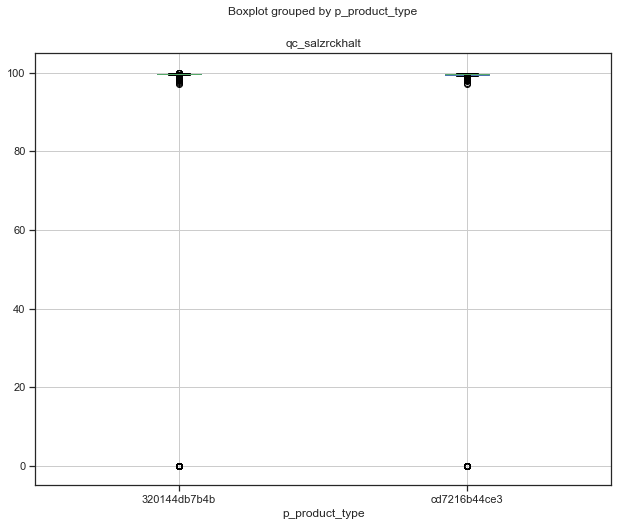

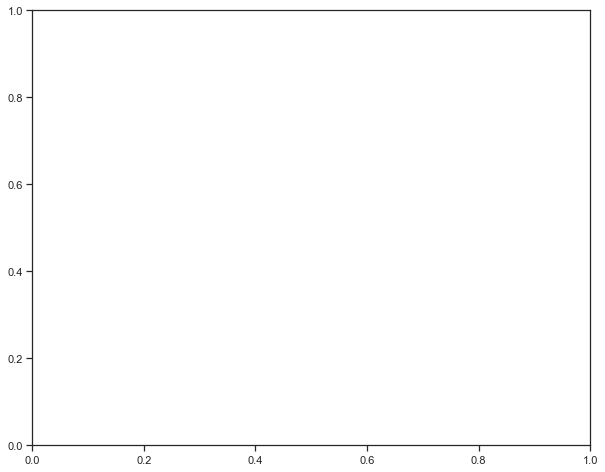

In [20]:
for gr in u_pgroup:
    XY[XY['p_product_group']==gr].boxplot(column='qc_salzrckhalt',by='p_product_type')